## Matplotlib Animations

https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/

https://gist.github.com/hugke729/ac3cf36500f2f0574a6f4ffe40986b4f

Ran on Google Colab 25-09-2020

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('ggplot')

from matplotlib import rc
rc('animation', html='jshtml')

# Line Plot

In [ ]:
x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
 
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

In [ ]:
def animate(i): line.set_ydata(F[i, :])

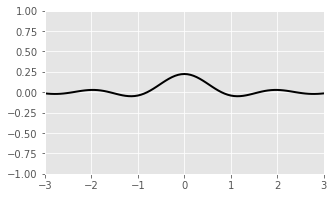

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))
line = ax.plot(x, F[0, :], color='k', lw=2)[0]
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)

In [ ]:
anim

# Pcolor

In [ ]:
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 / T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3
# Note that the length of G in each dimension must be one shorter than x and y, and that a flattened array must be passed to set_array.

In [ ]:
def animate(i): cax.set_array(G[:-1, :-1, i].flatten())

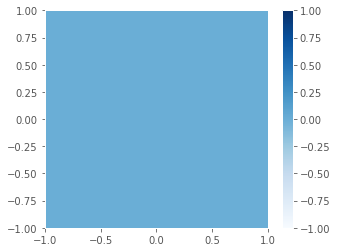

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.set(xlim=(-1, 1), ylim=(-1, 1))
cax = ax.pcolormesh(x, y, G[:-1, :-1, 0],vmin=-1, vmax=1, cmap='Blues')
fig.colorbar(cax);

In [ ]:
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1); anim

# Scatter

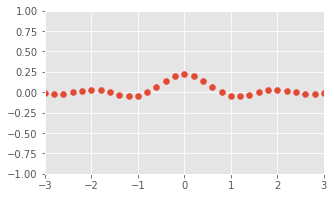

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-3, 3), ylim=(-1, 1))
scat = ax.scatter(x[::3], F[0, ::3])
 
def animate(i):
    y_i = F[i, ::3]
    scat.set_offsets(np.c_[x[::3], y_i])

#Note the set_offsets must be passed an N×2 array. Here we use np.c_[] for this purpose. The use of [::3] reduces the density of scatter points.

In [ ]:
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1); anim

# Quiver

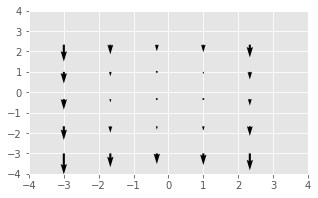

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.set(xlim=(-4, 4), ylim=(-4, 4))

step = 20 # Plot every 20th arrow
x_q, y_q = x[::step], y[::step]
 
# Create U and V vectors to plot
U = G[::step, ::step, :]
V = np.roll(U, shift=3, axis=2)
 
qax = ax.quiver(x_q, y_q, U[..., 0], V[..., 0], scale=100)
 
def animate(i): qax.set_UVC(U[..., i], V[..., i])

In [ ]:
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1); anim

# Contour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


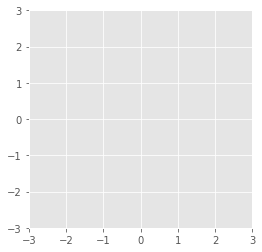

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(-3, 3), ylim=(-3, 3))

contour_opts = {'levels': np.linspace(-9, 9, 10), 'cmap':'RdBu', 'linewidths': 2}
cax = ax.contour(x, y, G[..., 0], **contour_opts)
 
def animate(i):
    ax.collections = []
    ax.contour(x, y, G[..., i], **contour_opts)

# Contour plots are a little different. We don’t use a set_… method, but instead simply redraw the contour plot for each frame. 
# The first line of the function gets rid of existing contours before plotting new ones.
# Using the contour_opts dict is a handy trick to avoid specifying the same keyword arguments in both calls to contour.

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1)

In [ ]:
anim

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: No contour levels were found within the data range.
  if __name__ == '__main__':


# Changing labels and text

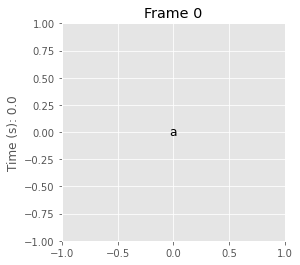

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=(-1, 1), ylim=(-1, 1))
string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
label = ax.text(0, 0, string_to_type[0], ha='center', va='center', fontsize=12)

def animate(i):
    label.set_text(string_to_type[:i+1])
    ax.set_ylabel('Time (s): ' + str(i/10))
    ax.set_title('Frame ' + str(i))

anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1);

In [ ]:
anim

# Changing other properties

With the exception of contours, every animate function requires finding the appropriate `set_…` method. The following list comprehension will give you all the potential `set` methods for, say, a line object. (You have to create this first.)

`[x for x in dir(line) if 'set_' in x]`

This often gives you a long list of potential values to `set`, but usually a quick scan through the list is all that is needed to find the method you want.

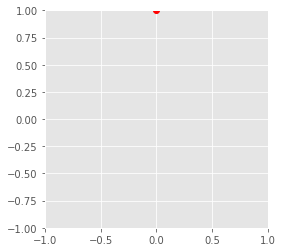

In [ ]:
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = np.cos(t)

fig, ax = plt.subplots(figsize=(4, 4))
ax.set(xlim=[-1, 1], ylim=[-1, 1])
dot, = ax.plot(x[0], y[0], 'ro')

def animate(i): dot.set_data(x[i], y[i])

anim = FuncAnimation(fig, animate, 100)

In [ ]:
anim